# Predicting Critical Temperature of Superconductors using Multiple Linear Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [2]:
dataset = pd.read_csv('train.csv')
dataset.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


C:\Users\Samira\Anaconda3\envs\tensorflow.session\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='critical_temp', ylabel='Density'>

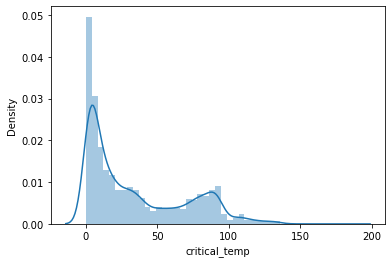

In [3]:
sns.distplot(dataset.critical_temp)

C:\Users\Samira\Anaconda3\envs\tensorflow.session\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 2.91 and sigma = 1.29



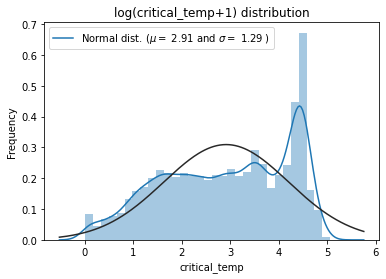

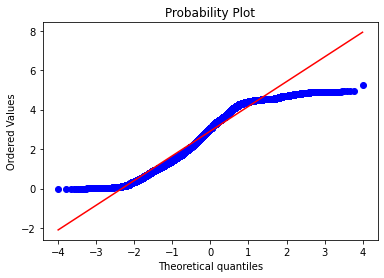

In [5]:
from scipy import stats
from scipy.stats import norm, skew
sns.distplot(np.log1p(dataset['critical_temp']) , fit=norm);
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(np.log1p(dataset['critical_temp']))
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('log(critical_temp+1) distribution')
#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(np.log1p(dataset['critical_temp']), plot=plt)
plt.show();

C:\Users\Samira\Anaconda3\envs\tensorflow.session\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 2.91 and sigma = 1.29



Text(0.5, 1.0, 'log(critical_temp+1) distribution')

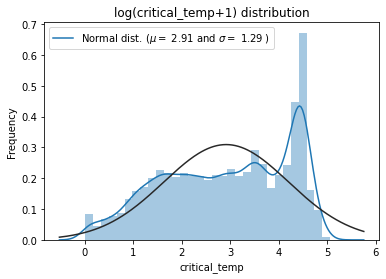

In [6]:
sns.distplot(np.log1p(dataset['critical_temp']) , fit=norm);
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(np.log1p(dataset['critical_temp']))
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('log(critical_temp+1) distribution')


<AxesSubplot:>

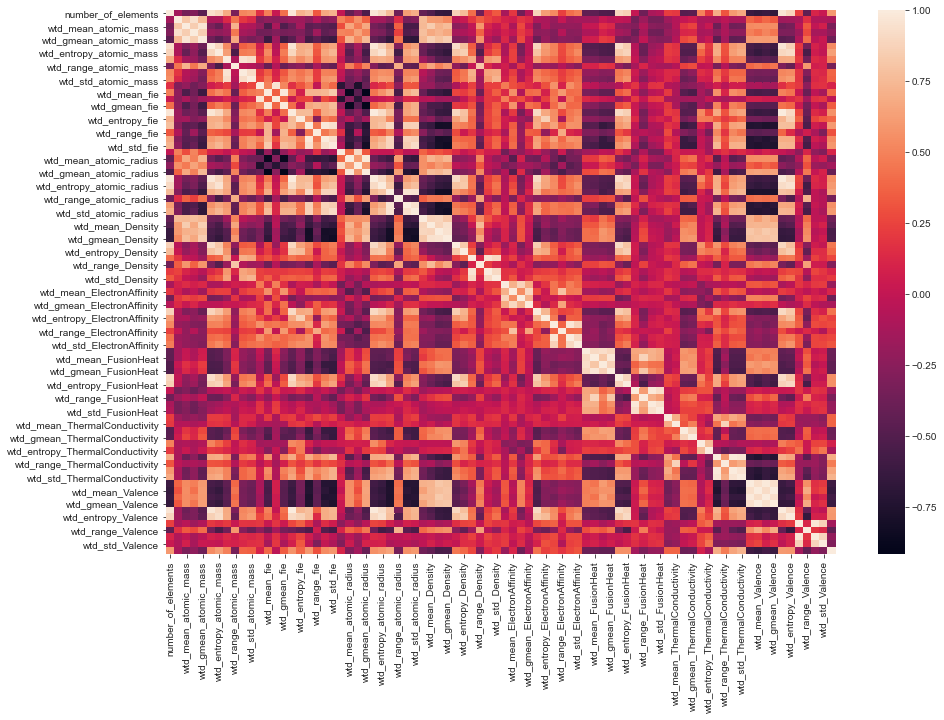

In [7]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(15, 10)
sns.heatmap(dataset.corr(), ax=ax)

In [8]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
print(X)

[[ 4.         88.9444675  57.86269229 ...  1.08571429  0.4330127
   0.43705882]
 [ 5.         92.729214   58.51841614 ...  1.12857143  0.63245553
   0.46860627]
 [ 4.         88.9444675  57.88524186 ...  1.11428571  0.4330127
   0.44469664]
 ...
 [ 2.         99.66319    95.609104   ...  3.2         0.5
   0.4       ]
 [ 2.         99.66319    97.0956022  ...  2.21        0.5
   0.46249324]
 [ 3.         87.46833333 86.8585     ...  1.8         1.41421356
   1.5       ]]


## Splitting the dataset into the Training set and Test set

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Features Scaling

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#  Feature selection using the Mutual Information metric
The scikit-learn machine learning library provides an implementation of mutual information for feature selection with numeric input and output variables via the mutual_info_regression() function.

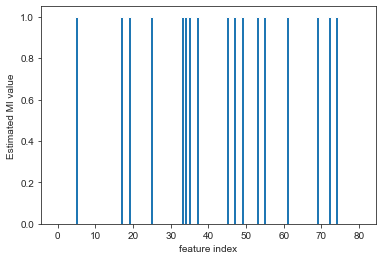

In [8]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
# feature selection
f_selector = SelectKBest(score_func=mutual_info_regression, k='all')
# learn relationship from training data
f_selector.fit(X_train, y_train)
# transform train input data
X_train_fs = f_selector.transform(X_train)
# transform test input data
X_test_fs = f_selector.transform(X_test)
# Plot the scores for the features
plt.bar([i for i in range(len(f_selector.scores_))], f_selector.scores_>0.8)
plt.xlabel("feature index")
plt.ylabel("Estimated MI value")
plt.show()

In [9]:
pd.DataFrame(dataset.corr()['critical_temp'].sort_values()) # to see which features are strongly correlated

,critical_temp
wtd_mean_Valence,-0.632401
wtd_gmean_Valence,-0.615653
mean_Valence,-0.600085
gmean_Valence,-0.573068
gmean_Density,-0.541684
...,...
std_ThermalConductivity,0.653632
range_atomic_radius,0.653759
range_ThermalConductivity,0.687654
wtd_std_ThermalConductivity,0.721271


In [10]:
# I am going to drop outliers in my data 
# we have few data where the T_c is larger than 100 K, So I will drop them to make a better prediction
ind_drop = dataset[(dataset['critical_temp']>100)].index
dataset= dataset.drop(ind_drop,axis=0)

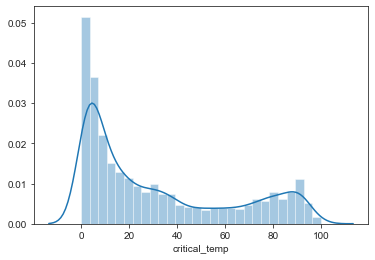

In [11]:
sns.distplot(dataset.critical_temp)

## Training the Multiple Linear Regression model on the Training set

In [13]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [14]:
print(regressor.coef_)

[  -4.41512491   25.1223382   -31.75824305  -16.21309021   25.9106049
  -13.37745135    1.29589594   10.82300501    0.4402342   -10.46229492
    2.02092875    9.52271196  -26.49966736   -7.82128957   24.37252434
  -47.52720236   13.93880869   22.65397232    4.60170518  -22.99558366
   -2.86698807   -8.14896581   91.53918847    1.55735222 -100.2428437
   30.84541813   18.62976646   11.81028501   -3.03808455   -7.4968692
   -7.79184499  -12.92103577   -0.67633786    4.52581127    8.22237559
    5.69280923   -6.37182766   -5.92067343    0.24693711    9.92572621
   -2.97334794   -3.13852633   17.36627708    5.38297143  -18.76708398
    1.28907456   -5.9664443   -20.88040161   -3.63302777   26.07805576
  -11.05593355   18.748559    -25.8557252   -14.50433715   19.09842373
   -7.94020233    9.5203222    -6.9351604     7.24365489   -5.01515507
    4.66547745   -3.40114828   23.61659913   -1.83407177  -12.64712175
    3.79171223    0.46067642  -13.44127771   -9.80759324   17.54687708
   -0.700

In [15]:
coeff_df = pd.DataFrame(regressor.coef_, columns=['Coefficient'])
coeff_df

,Coefficient
0,-4.415125
1,25.122338
2,-31.758243
3,-16.213090
4,25.910605
...,...
76,-25.235029
77,5.232407
78,-0.992463
79,3.568486


## Predicting the Test set results

In [16]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[74.28 85.  ]
 [69.33 85.5 ]
 [18.14 11.6 ]
 ...
 [23.32 51.  ]
 [ 5.4  60.  ]
 [75.51 79.  ]]


Text(0.5, 1.0, 'Critical Temperature__Multiple Regression_Model')

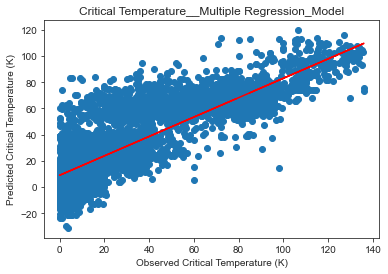

In [17]:
# plot the dataset and the model's line of best fit
# plot the dataset
plt.scatter(y_test, y_pred)
# plot the line of best fit
m, b = np.polyfit(y_test, y_pred, 1)
# m = slope, b=intercept y=b+m*x
plt.plot(y_test, m*y_test + b,  color='r')
# show the plot
plt.xlabel('Observed Critical Temperature (K)')
plt.ylabel('Predicted Critical Temperature (K)')
plt.title('Critical Temperature__Multiple Regression_Model')

In [18]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

307.32614790780826

In [19]:
from math import sqrt
rms = sqrt(mean_squared_error(y_test, y_pred))
rms

17.530720119487626

In [20]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 73.29 %
Standard Deviation: 1.49 %


# Polynomial Regression
From Preprocessing, import PolynomialFeatures, which will help us transform our original data set by adding polynomial features**

We will go from the equation in the form (shown here as if we only had one x feature):

$$\hat{y} = \beta_0 + \beta_1x_1 + \epsilon $$

and create more features from the original x feature for some *d* degree of polynomial.

$$\hat{y} = \beta_0 + \beta_1x_1 + \beta_1x^2_1 +  ... + \beta_dx^d_1 + \epsilon$$

Then we can call the linear regression model on it, since in reality, we're just treating these new polynomial features x^2, x^3, ... x^d as new features. Obviously we need to be careful about choosing the correct value of *d* , the degree of the model. Our metric results on the test set will help us with this!

**The other thing to note here is we have multiple X features, not just a single one as in the formula above, so in reality, the PolynomialFeatures will also take *interaction* terms into account for example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].**

In [27]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)
# Converter "fits" to data, in this case, reads in every X column
# Then it "transforms" and ouputs the new polynomial data
poly_features = polynomial_converter.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [28]:
regressor.fit(X_train,y_train)

LinearRegression()

In [29]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[77.21 73.  ]
 [21.99 12.  ]
 [-4.32  1.3 ]
 ...
 [15.43 18.4 ]
 [75.41 84.7 ]
 [27.18 29.3 ]]


Text(0, 0.5, 'Predicted Critical Temperature (K)')

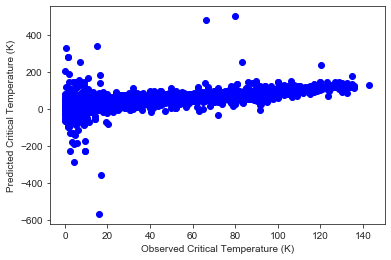

In [30]:
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Observed Critical Temperature (K)')
plt.ylabel('Predicted Critical Temperature (K)')

In [31]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 22.32 %
Standard Deviation: 27.12 %


In [32]:
from sklearn.metrics import mean_squared_error
from math import sqrt
print('MSE:', mean_squared_error(y_test, y_pred))
print("RMSE:", sqrt(mean_squared_error(y_test, y_pred)))

MSE: 617.0831674190131
RMSE: 24.84115873744647
